In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## THE DATA IS HIGHLY IMBALANCED

<Axes: xlabel='diabetes', ylabel='Count'>

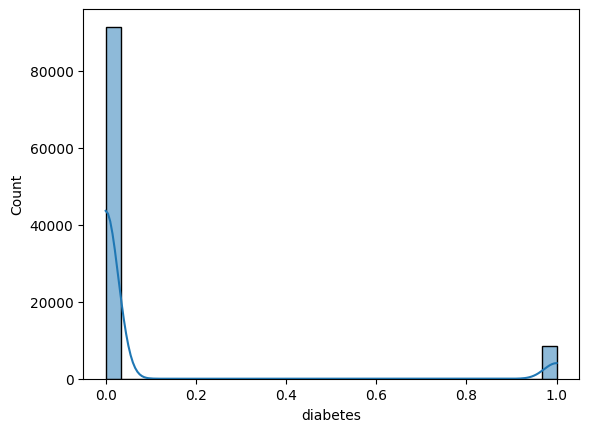

In [10]:
sns.histplot(df['diabetes'],kde=True,bins=30)

## Expolatory Data Analysis

In [11]:
df[df.diabetes == 1].count()

gender                 8500
age                    8500
hypertension           8500
heart_disease          8500
smoking_history        8500
bmi                    8500
HbA1c_level            8500
blood_glucose_level    8500
diabetes               8500
dtype: int64

In [12]:
df1 = df.drop(columns = ['gender','smoking_history'])

In [13]:
df1.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


Text(0.5, 1.0, 'Correlation_Matrix')

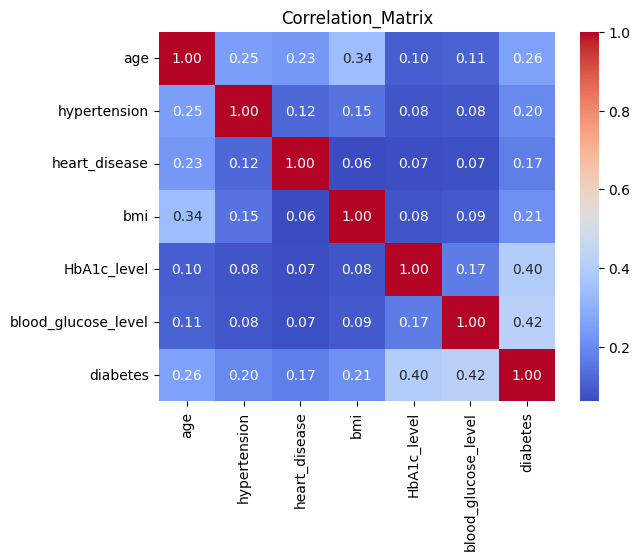

In [14]:
sns.heatmap(data=df1.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation_Matrix")

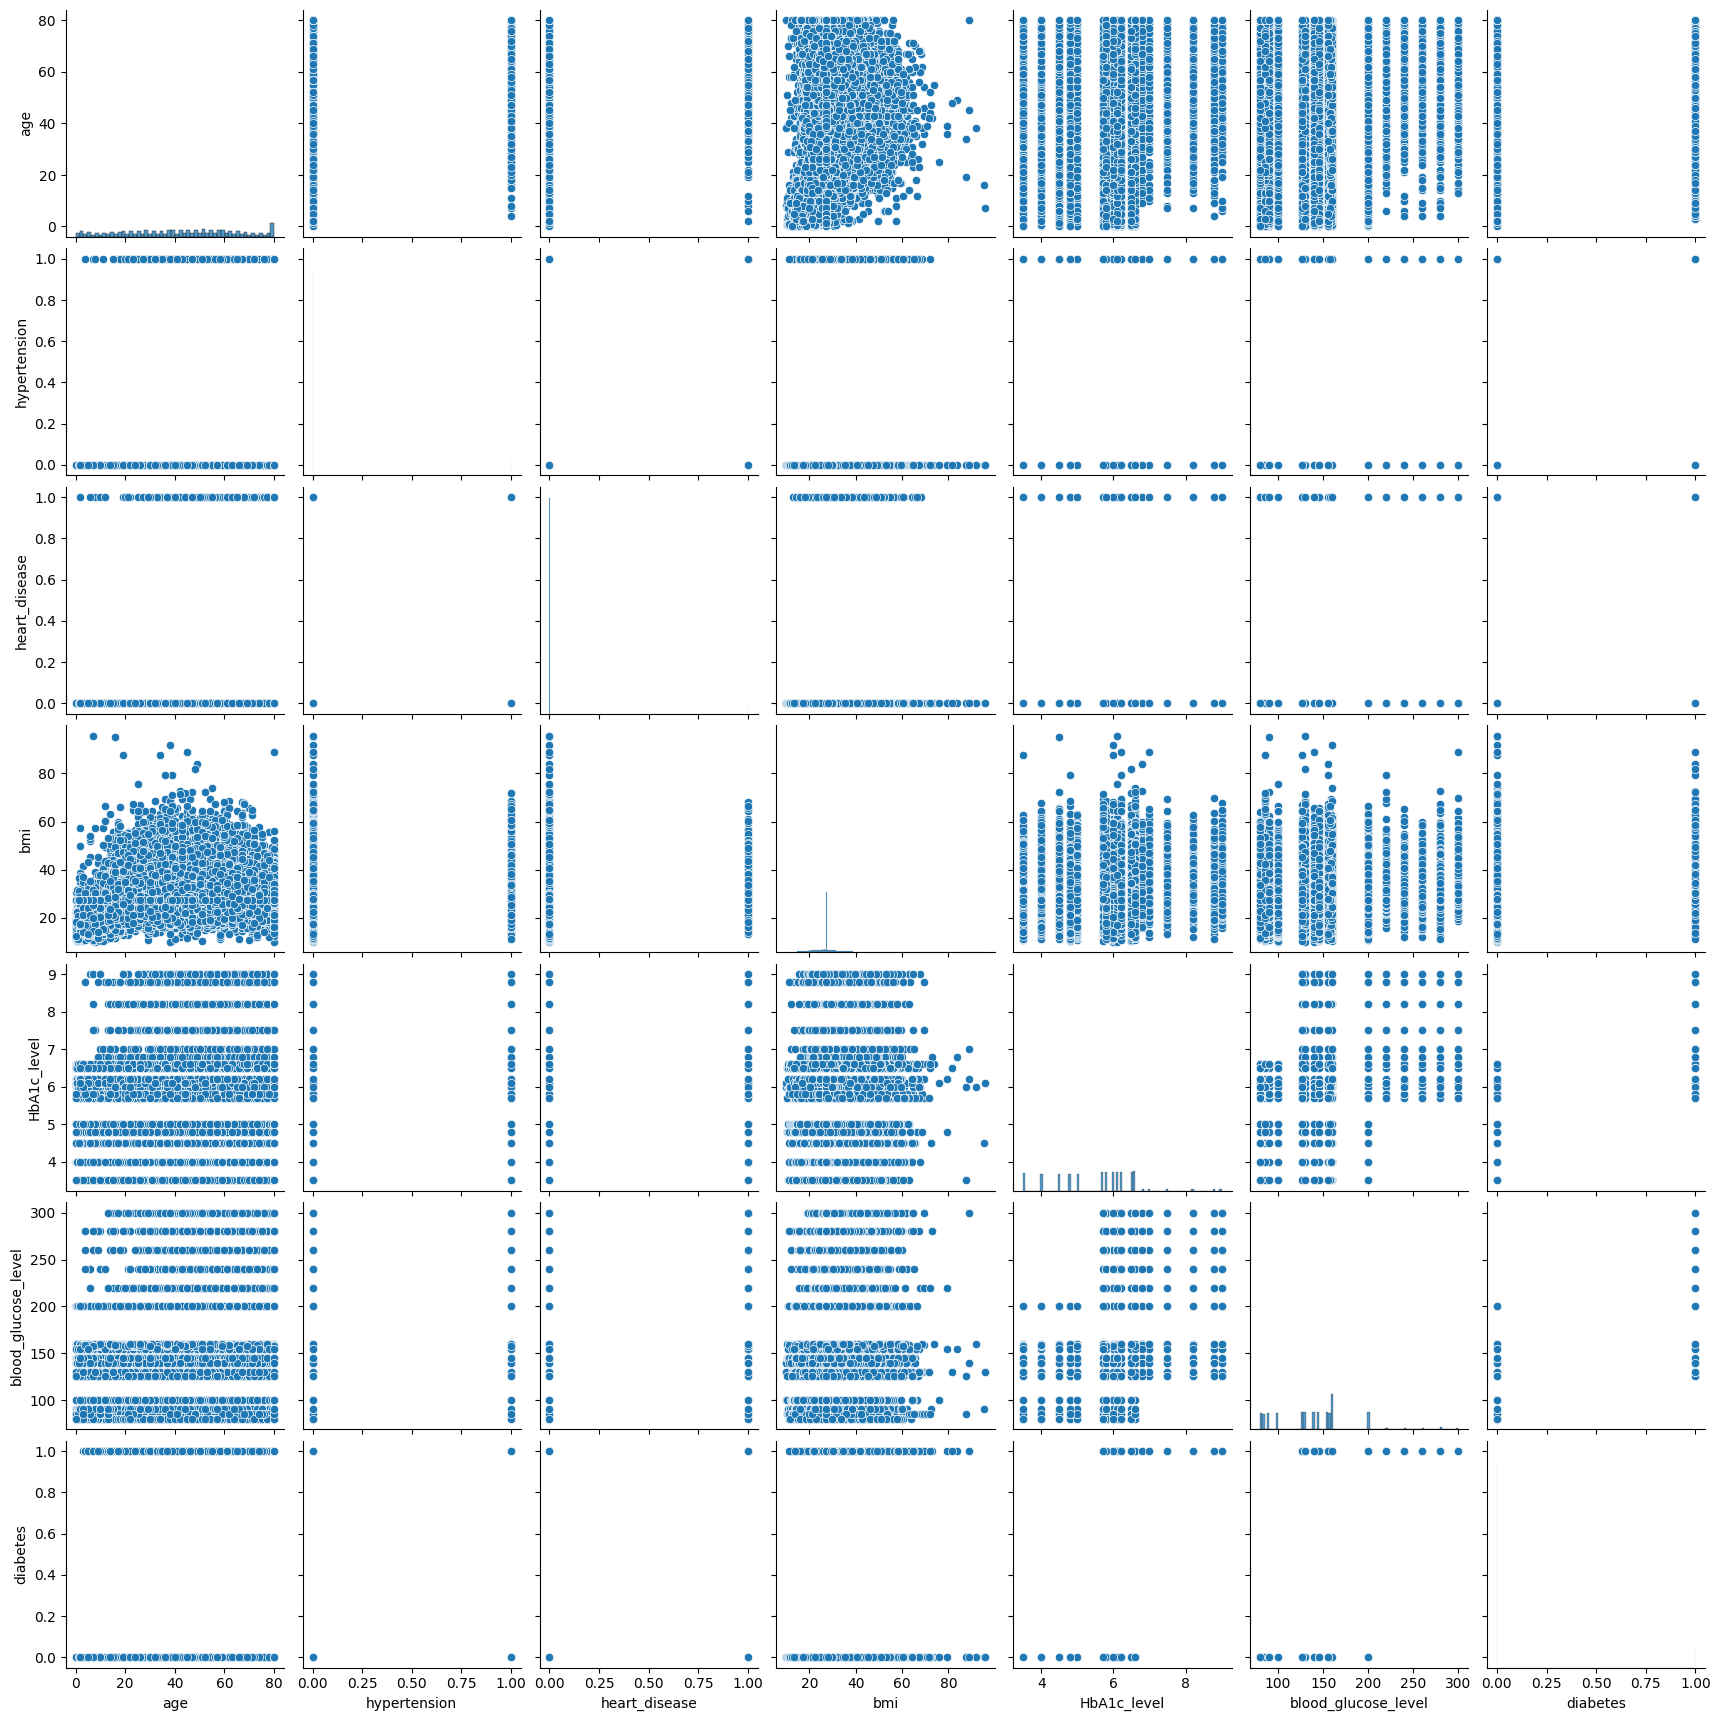

In [15]:
sns.pairplot(df1)

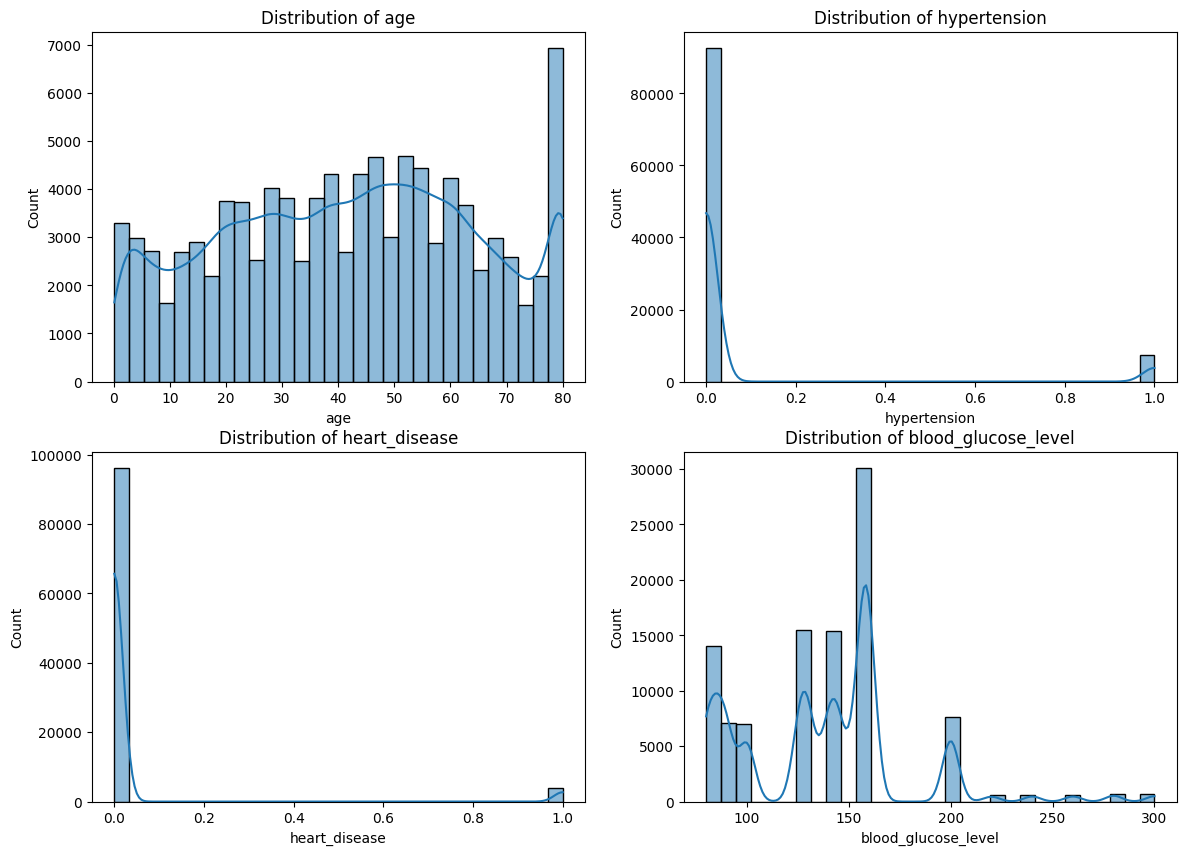

In [16]:
# distrubution of Numeric_cols 

numeric_cols = ['age','hypertension','heart_disease','blood_glucose_level']
plt.figure(figsize = (14,10))
for i,col in enumerate(numeric_cols):
    plt.subplot( 2, 2, i + 1)
    sns.histplot(df1[col],kde=True,bins=30)
    plt.title(f'Distribution of {col}')


    

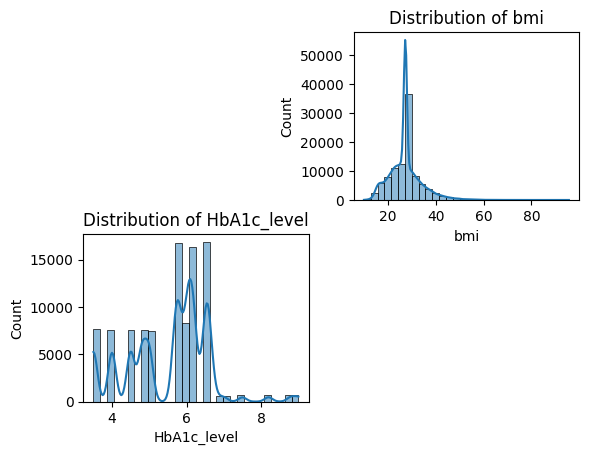

In [17]:
# distribution of decimal_cols
decimal_cols = ['bmi','HbA1c_level']
for i,col in enumerate(decimal_cols):
    plt.subplot(2,2,i+2)
    sns.histplot(df1[col],kde=True,bins=30)
    plt.title(f'Distribution of {col}')

## Model Building

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [19]:
df_encoded = pd.get_dummies(df, columns=['gender','smoking_history'],drop_first = True)

In [20]:
X = df_encoded.drop(columns='diabetes')
y = df_encoded['diabetes']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [22]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[0.91241241, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.47447447, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.52452452, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.46196196, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.28678679, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]], shape=(80000, 13))

In [35]:
X_test_scaled[0]


array([0.16166166, 0.        , 0.        , 0.13213544, 0.41818182,
       0.20909091, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

## Model Training

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter = 1000,class_weight = 'balanced',random_state= 42)

model.fit(X_train_scaled,y_train.values)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [32]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.43      0.88      0.58      1708

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.76     20000
weighted avg       0.94      0.89      0.91     20000



In [27]:
print(confusion_matrix(y_test,y_pred))

[[16284  2008]
 [  200  1508]]


Text(50.722222222222214, 0.5, 'Actual Label')

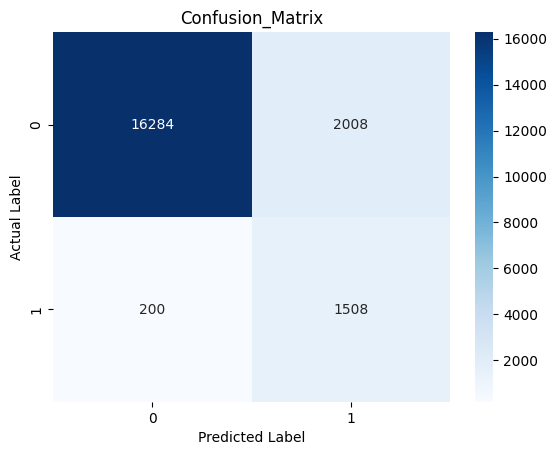

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',fmt='d',annot=True)
plt.title("Confusion_Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [29]:
!pip3 install joblib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [36]:
import joblib

joblib.dump(model, 'model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']